In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import binascii
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
from matplotlib import rcParams
import RTlib

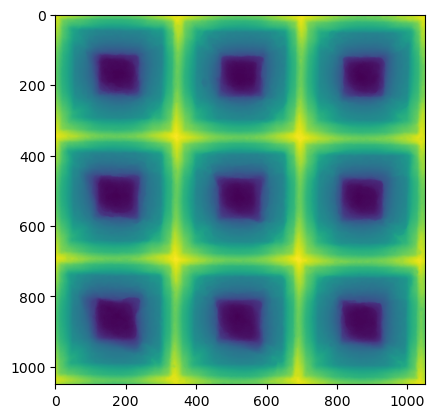

In [2]:
fname = '../data/20240524_hex/q010.vk4'
fname = '../data/SOfilter/run132_KA.vk4'

# Load data
shape_lib = RTlib.Load_vk4Data_basic(fname)
data = shape_lib.m*(-1)

# Pitch
p = 1.9
pitch_ind = int(p/shape_lib.xy_cal)

# =======================
# Cut data if needed
cut_startx = 190
cut_starty = 180
# Check
data = data[cut_startx:cut_startx+pitch_ind*3,cut_starty:cut_starty+pitch_ind*3]
plt.imshow(data)
# =======================


data -= np.min(data)
max_z = np.max(data)


x_1D = shape_lib.x[cut_startx:cut_startx+pitch_ind*3]
y_1D = shape_lib.y[cut_starty:cut_starty+pitch_ind*3]

x_1D -= np.min(x_1D)
y_1D -= np.min(y_1D)
plot_max_aspect = np.max(np.array([np.max(x_1D),np.max(y_1D),np.max(data)]))

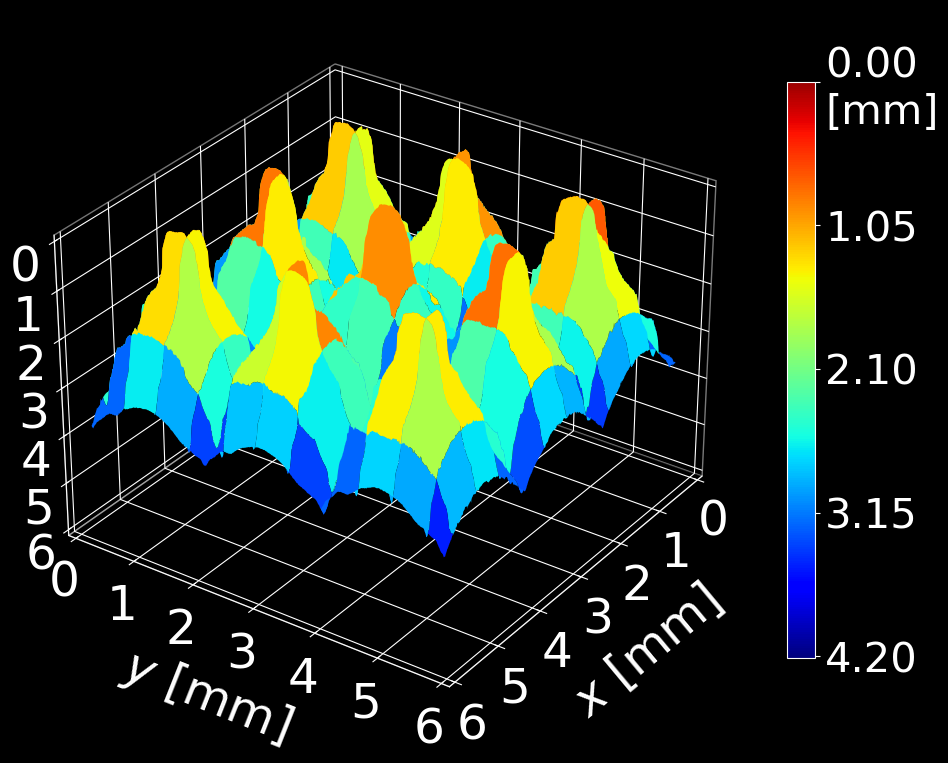

In [5]:
plot_param = {
    'data': data,
    'figsize' : [10,7.5],
    
    'x_1D': x_1D,
    'y_1D': y_1D,

    'axis_labelsize' : 35,
    'cb_labelsize' : 30,
    'plot_labelsize' : 35,
    'axis_labelpad' : 25,


    'plot_linewidth' : 0,
    'plot_rstride' : 100,
    'plot_cstride' : 100,
    'plot_alpha' : 1,

    'plot_elev' : 30,
    'plot_azim' : 35,

    'plot_max_aspect' : plot_max_aspect,
    'plot_xticks' : np.arange(0,plot_max_aspect+1.0,1.0),
    'plot_yticks' : np.arange(0,plot_max_aspect+1.0,1.0),
    'plot_zticks' : np.arange(0,plot_max_aspect+1.0,1.0)[::-1],
    'plot_label' : ['$x$ [mm]','$y$ [mm]'],



    'cb_zlim' : [np.max(data),np.min(data)],
    'cb_tick_label' : np.linspace(round(np.max(data),1),round(np.min(data),1),5),
    'cb_shrink' : 0.8,
    'cb_unit' : '[mm]',

    'save_filename' : 'koukishinnouseinashounenn.png',
    'dpi' : 500,
    }

shape_lib.Plot_3D(**plot_param)